# PennyLane - Qiskit Noise Model

## Initiate the device and create a quantum circuit

- Link: [PennyLane - The Aer device: Noise Model](https://docs.pennylane.ai/projects/qiskit/en/latest/devices/aer.html)
- Link: [Qiskit - AerSimulator](https://qiskit.org/documentation/stubs/qiskit_aer.AerSimulator.html)

In [1]:
# !pip install pennylane
# !pip install qiskit
# !pip install pennylane-qiskit

In [2]:
import pennylane as qml

dev = qml.device('qiskit.aer', wires=2)

In [3]:
@qml.qnode(dev)
def circuit(x, y, z):
    qml.RZ(z, wires=[0])
    qml.RY(y, wires=[0])
    qml.RX(x, wires=[0])
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(wires=1))

In [4]:
circuit(0.2, 0.1, 0.3)

tensor(0.97070312, requires_grad=True)

## Backend

In [5]:
dev.capabilities()['backend']

['aer_simulator',
 'aer_simulator_statevector',
 'aer_simulator_density_matrix',
 'aer_simulator_stabilizer',
 'aer_simulator_matrix_product_state',
 'aer_simulator_extended_stabilizer',
 'aer_simulator_unitary',
 'aer_simulator_superop',
 'qasm_simulator',
 'statevector_simulator',
 'unitary_simulator',
 'pulse_simulator']

In [6]:
from qiskit import Aer
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [7]:
dev = qml.device('qiskit.aer', wires=2, backend='aer_simulator_statevector')

## Backend Methods and Options

In [8]:
dev = qml.device("qiskit.aer", wires=2, method="automatic")

In [9]:
dev = qml.device(
    'qiskit.aer',
    wires=2,
    backend='unitary_simulator',
    validation_threshold=1e-6
)

## Noise models

### Custum Noise Model
- Link: [Qiskit documentation - NoiseModel](https://qiskit.org/documentation/stubs/qiskit_aer.noise.NoiseModel.html#qiskit_aer.noise.NoiseModel)
- Link: [Building Noise Models](https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html)
- Link: [Qiskit NoiseModel.add_readout_error](https://qiskit.org/documentation/stubs/qiskit_aer.noise.NoiseModel.add_readout_error.html#qiskit_aer.noise.NoiseModel.add_readout_error)
- In Qiskit, here are some values from the real device
    - readout error, median about 0.01
    - cnot error, median about 0.0075
    - pauliX error, median about 0.00025

In [21]:
import pennylane as qml

import qiskit
import qiskit.providers.aer.noise as noise

# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Create a PennyLane device
dev = qml.device('qiskit.aer', wires=2, noise_model=noise_model)

# Create a PennyLane quantum node run on the device
@qml.qnode(dev)
def circuit(x, y, z):
    qml.RZ(z, wires=[0])
    qml.RY(y, wires=[0])
    qml.RX(x, wires=[0])
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(wires=1))

# Result of noisy simulator
print(circuit(0.2, 0.1, 0.3))

0.96484375


- When applying a single qubit gate, flip the state of the qubit with probability p_gate1.

- When applying a 2-qubit gate apply single-qubit errors to each qubit.

- When resetting a qubit reset to 1 instead of 0 with probability p_reset.

- When measuring a qubit, flip the state of the qubit with probability p_meas.

In [10]:
# Example error probabilities
# p_reset = 0.03
p_measure_error = 0.01
p_gate1 = 0.05

# QuantumError objects
# error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X', p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NameError: name 'pauli_error' is not defined

In [ ]:
import pennylane as qml
import qiskit

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error


# Example of error probabilities
# p_reset = 0.03
p_readout_error = 0.01
p_gate1_bitflip_error = 0.00025
p_cnot_error = 0.0075

# QuantumError objects
# error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X', p_readout_error), ('I', 1 - p_readout_error)])
error_gate1 = pauli_error(
    [('X', p_gate1_bitflip_error), ('I', 1 - p_gate1_bitflip_error)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_model = noise.NoiseModel()
# noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(p_readout_error, "measure")
noise_model.add_all_qubit_quantum_error(
    p_gate1_bitflip_error, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
noise_model

In [ ]:
# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

In [ ]:
# noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
# noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Create a PennyLane device
dev = qml.device('qiskit.aer', wires=2, noise_model=noise_model)

# Create a PennyLane quantum node run on the device


@qml.qnode(dev)
def circuit(x, y, z):
    qml.RZ(z, wires=[0])
    qml.RY(y, wires=[0])
    qml.RX(x, wires=[0])
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(wires=1))


# Result of noisy simulator
print(circuit(0.2, 0.1, 0.3))

In [ ]:
dev._circuit.draw(output="mpl")

## Qiskit - Building Noise Model

- Link: [Qiskit Aer API Reference - Noise Models](https://qiskit.org/documentation/stubs/qiskit_aer.noise.NoiseModel.html)
- Link: [PennyLane Qiskit Plugin - Noise Models](https://pennylane-qiskit.readthedocs.io/en/latest/gettingstarted.html#noise-models)

### Noise model from the device

- You can instantiate a noise model and apply it to the device by calling

In [11]:
import pennylane as qml

import qiskit
from qiskit import IBMQ

# qiskit.IBMQ.save_account("TOKEN_NUMBER")
qiskit.IBMQ.load_account()  # Load account from disk
provider = IBMQ.get_provider(
    hub='ibm-q-skku', group='yonsei-uni', project='yu-graduate')

In [12]:
# Get the information about the device

from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_gate_map

backend = provider.get_backend('ibm_cairo')
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (160139.28564466984 > 2 * 64337.37278119189). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (162301.71150088374 > 2 * 46101.266108694996). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (184172.43161080335 > 2 * 86146.25335891175). Truncating to maximum value.
  warn("Device model returned 

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['id', 'x', 'reset', 'sx', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)), ('sx', (21,)), ('

C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (160139.28564466984 > 2 * 64337.37278119189). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (162301.71150088374 > 2 * 46101.266108694996). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (184172.43161080335 > 2 * 86146.25335891175). Truncating to maximum value.
  warn("Device model returned 

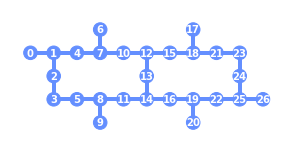

In [13]:
# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get backend coupling design in image
plot_gate_map(backend)

In [14]:
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (160139.28564466984 > 2 * 64337.37278119189). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (162301.71150088374 > 2 * 46101.266108694996). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (184172.43161080335 > 2 * 86146.25335891175). Truncating to maximum value.
  warn("Device model returned 

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['id', 'x', 'reset', 'sx', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)), ('sx', (21,)), ('

C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (160139.28564466984 > 2 * 64337.37278119189). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (162301.71150088374 > 2 * 46101.266108694996). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\user\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (184172.43161080335 > 2 * 86146.25335891175). Truncating to maximum value.
  warn("Device model returned 

In [15]:
dev = qml.device('qiskit.aer', wires=2, noise_model=noise_model)